In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
main_dish = pd.read_csv("main_dish.csv")
side_dish = pd.read_csv("side_dish.csv")
kimchi = pd.read_csv("removed_kimchi.csv")
rice = pd.read_csv("removed_rice.csv")
soup = pd.read_csv("removed_soup.csv")

In [7]:
kimchi = kimchi.drop(kimchi.columns[0], axis = 1)


In [164]:
main_dish.head()
side_dish.head()
kimchi.head()
rice.head()
soup.head()

main_dish.info()
side_dish.info()
kimchi.info()
rice.info()
soup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RecipeID      202 non-null    int64  
 1   Name          202 non-null    object 
 2   식품대분류         202 non-null    object 
 3   식품상세분류        202 non-null    object 
 4   1회제공량(g)      202 non-null    int64  
 5   calories      202 non-null    float64
 6   carbohydrate  202 non-null    float64
 7   protein       202 non-null    float64
 8   fat           202 non-null    float64
 9   sugar         202 non-null    float64
 10  sodium        202 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RecipeID      151 non-null    int64  
 1   Name          151 non-null    obje

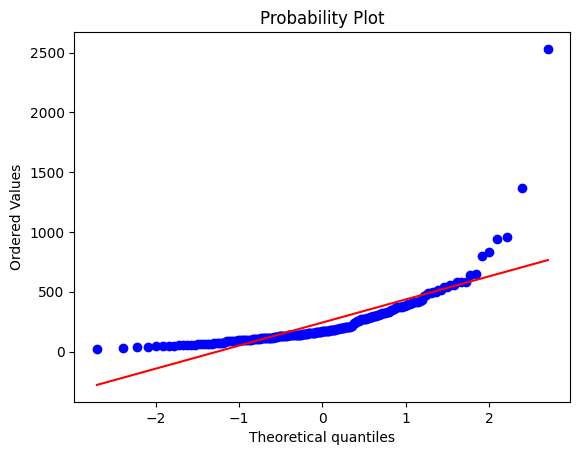

In [165]:
import pylab 
import scipy.stats as stats
stats.probplot(main_dish.calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [166]:
columns = ["RecipeID","Name","calories","carbohydrate","protein","fat","sugar","sodium",]
main_dish_dataset = main_dish[columns]
side_dish_dataset = side_dish[columns]
kimchi_dataset = kimchi[columns]
rice_dataset = rice[columns]
soup_dataset = soup[columns]

In [167]:
random_meal = []
for i in range(100):
    meal_list = [
        random.randint(1, len(main_dish_dataset)),
        random.randint(1, len(side_dish_dataset)),
        random.randint(1, len(rice_dataset)),
        random.randint(1, len(kimchi_dataset)),
        random.randint(1, len(soup_dataset)),
    ]
    random_meal.append(meal_list)

In [168]:
random_meal_cal = [];random_meal_car = []
random_meal_pro= [];random_meal_fat = []
random_meal_sug = [];random_meal_sod = []
data_set_list = [main_dish_dataset, side_dish_dataset, rice_dataset, kimchi_dataset, soup_dataset]
for i in range(len(random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

        random_meal_cal.append(meal_cal);random_meal_car.append(meal_car)
        random_meal_pro.append(meal_pro);random_meal_fat.append(meal_fat)
        random_meal_sug.append(meal_sug);random_meal_sod.append(meal_sod)

print(recipe_id)
print(row)
print(random_meal_cal)
print(len(random_meal_cal))


64
RecipeID            64
Name              도가니탕
calories        198.17
carbohydrate       4.1
protein          41.76
fat               1.63
sugar              0.0
sodium          751.98
Name: 63, dtype: object
[1000.5, 767.3900000000001, 1490.63, 1840.6, 1255.54, 1256.25, 1275.1399999999999, 556.69, 731.05, 1039.13, 1479.11, 1823.4599999999996, 1082.07, 897.27, 1266.36, 1842.0500000000002, 1204.93, 665.28, 945.32, 962.4, 1034.0600000000002, 1021.86, 1372.76, 1451.65, 1465.17, 1000.38, 984.8000000000001, 1552.23, 842.05, 1258.56, 1748.87, 1020.29, 521.89, 1210.1399999999999, 969.52, 1379.82, 1316.8899999999999, 1717.67, 1347.78, 1104.79, 1184.8700000000001, 1421.65, 1157.1399999999999, 867.42, 1020.8399999999999, 367.1600000000001, 1315.0700000000002, 1606.26, 962.3799999999999, 1333.29, 1067.53, 1013.33, 1020.6199999999999, 1380.15, 1544.22, 3435.1499999999996, 1067.31, 1155.27, 919.85, 867.2900000000001, 1141.61, 1005.5799999999999, 915.6999999999999, 1335.3400000000001, 1004.58, 843

In [169]:
print(random_meal)

[[119, 10, 16, 17, 187], [177, 138, 45, 23, 129], [5, 55, 18, 7, 48], [114, 110, 4, 12, 1], [129, 148, 52, 16, 167], [170, 146, 49, 7, 42], [198, 35, 46, 2, 3], [67, 83, 34, 14, 9], [92, 16, 18, 16, 8], [140, 108, 48, 19, 148], [58, 26, 53, 10, 84], [136, 96, 42, 26, 46], [91, 30, 4, 11, 83], [179, 15, 23, 22, 149], [39, 52, 4, 14, 133], [8, 151, 35, 23, 100], [52, 110, 47, 4, 168], [186, 97, 39, 25, 122], [123, 105, 24, 19, 77], [69, 53, 50, 20, 123], [175, 12, 49, 12, 70], [132, 140, 31, 12, 91], [1, 30, 7, 11, 93], [100, 21, 14, 26, 142], [89, 128, 15, 13, 115], [128, 92, 5, 3, 174], [161, 102, 53, 18, 116], [59, 52, 55, 18, 96], [149, 124, 35, 14, 81], [102, 151, 9, 3, 134], [128, 100, 22, 22, 139], [172, 150, 51, 8, 180], [152, 86, 19, 25, 156], [16, 33, 38, 13, 17], [118, 14, 51, 17, 47], [35, 70, 13, 14, 153], [136, 136, 12, 12, 19], [96, 1, 23, 5, 43], [16, 84, 33, 10, 2], [42, 4, 3, 13, 1], [20, 40, 52, 22, 26], [111, 36, 33, 15, 6], [110, 109, 46, 16, 173], [198, 142, 49, 23,

In [170]:
max_daily_Calories=2700
max_daily_Carbohydrate=325
max_daily_Protein=200
max_daily_fat=100
max_daily_Sugar=40
max_daily_Sodium=3000
max_list=[max_daily_Calories, max_daily_Carbohydrate, max_daily_Protein, max_daily_fat, max_daily_Sugar, max_daily_Sodium]

max_one_meal_Calories=1500
max_one_meal_Carbohydrate=200
max_one_meal_Protein=150
max_one_meal_fat=60
max_one_meal_Sugar=30
max_one_meal_Sodium=2000
max_one_meal_list=[max_one_meal_Calories, max_one_meal_Carbohydrate, max_one_meal_Protein, max_one_meal_fat, max_one_meal_Sugar, max_one_meal_Sodium]

In [171]:
filtered_random_meal = random_meal.copy()
random_meal_nut = [random_meal_cal, random_meal_car, random_meal_pro, random_meal_fat, random_meal_sug, random_meal_sod]
for i in range(len(random_meal)):
    for j in range(6): 
        if random_meal_nut[j][i] > max_one_meal_list[j]:
            filtered_random_meal[i] = 0
print(filtered_random_meal)
filtered_random_meal = [i for i in filtered_random_meal if i != 0]
print(filtered_random_meal)
print(len(filtered_random_meal))

[0, [177, 138, 45, 23, 129], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [123, 105, 24, 19, 77], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [102, 151, 9, 3, 134], 0, 0, [152, 86, 19, 25, 156], 0, 0, 0, 0, 0, 0, 0, 0, 0, [110, 109, 46, 16, 173], [198, 142, 49, 23, 109], 0, [112, 50, 2, 23, 100], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [80, 84, 46, 18, 140], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [87, 114, 2, 20, 161], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[177, 138, 45, 23, 129], [123, 105, 24, 19, 77], [102, 151, 9, 3, 134], [152, 86, 19, 25, 156], [110, 109, 46, 16, 173], [198, 142, 49, 23, 109], [112, 50, 2, 23, 100], [80, 84, 46, 18, 140], [87, 114, 2, 20, 161]]
9


In [172]:
filtered_meal_cal = [];filtered_meal_car = []
filtered_meal_pro= [];filtered_meal_fat = []
filtered_meal_sug = [];filtered_meal_sod = []
for i in range(len(filtered_random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

        filtered_meal_cal.append(meal_cal);filtered_meal_car.append(meal_car)
        filtered_meal_pro.append(meal_pro);filtered_meal_fat.append(meal_fat)
        filtered_meal_sug.append(meal_sug);filtered_meal_sod.append(meal_sod)
filtered_meal_list = [filtered_meal_cal, filtered_meal_car, filtered_meal_pro, filtered_meal_fat, filtered_meal_sug, filtered_meal_sod]
print(filtered_meal_cal)
print(len(filtered_meal_cal))
print(len(filtered_meal_sod))

[1000.5, 767.3900000000001, 1490.63, 1840.6, 1255.54, 1256.25, 1275.1399999999999, 556.69, 731.05]
9
9


In [173]:
final_meal = pd.DataFrame()
final_meal["RecipeID"] = filtered_random_meal
final_meal["calories"] = filtered_meal_cal
final_meal["carbohydrate"] = filtered_meal_car
final_meal["protein"] = filtered_meal_pro
final_meal["fat"] = filtered_meal_fat
final_meal["sugar"] = filtered_meal_sug
final_meal["sodium"] = filtered_meal_sod

print(final_meal)
final_meal.to_csv("final_meal.csv")
final_meal_csv = pd.read_csv("final_meal.csv")

                  RecipeID  calories  carbohydrate  protein    fat  sugar  \
0  [177, 138, 45, 23, 129]   1000.50        128.27    50.72  31.61  18.88   
1   [123, 105, 24, 19, 77]    767.39        102.18    43.59  20.48  10.88   
2    [102, 151, 9, 3, 134]   1490.63         49.68    90.60  67.81  18.74   
3   [152, 86, 19, 25, 156]   1840.60        293.96    78.43  39.08  34.10   
4  [110, 109, 46, 16, 173]   1255.54        168.11    44.58  44.98   5.66   
5  [198, 142, 49, 23, 109]   1256.25        163.40    59.49  40.53  12.57   
6    [112, 50, 2, 23, 100]   1275.14        202.53    63.10  23.67   7.28   
7    [80, 84, 46, 18, 140]    556.69        103.56    15.92   8.85  12.34   
8    [87, 114, 2, 20, 161]    731.05         32.99    44.51  11.10  15.63   

    sodium  
0  2123.23  
1  1738.43  
2  4276.61  
3  7569.53  
4  3280.53  
5  3884.76  
6  2429.35  
7  2392.70  
8  3135.10  


In [174]:
final_meal.iloc[:,1:7].corr()

,calories,carbohydrate,protein,fat,sugar,sodium
calories,1.000000,0.656154,0.863540,0.750627,0.530559,0.808714
carbohydrate,0.656154,1.000000,0.267144,0.119415,0.358457,0.578311
protein,0.863540,0.267144,1.000000,0.784431,0.497852,0.622857
fat,0.750627,0.119415,0.784431,1.000000,0.228189,0.459756
sugar,0.530559,0.358457,0.497852,0.228189,1.000000,0.795838
sodium,0.808714,0.578311,0.622857,0.459756,0.795838,1.000000


In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

scaler = StandardScaler()
final_data = scaler.fit_transform(final_meal.iloc[:,1:7].to_numpy())

In [176]:
final_data

array([[-0.33874904, -0.13265319, -0.18647007, -0.02301564,  0.47209126,
        -0.78432275],
       [-0.94654702, -0.47778666, -0.533707  , -0.65988778, -0.53235823,
        -1.01606297],
       [ 0.93918851, -1.17228675,  1.75571907,  2.04839237,  0.45451339,
         0.51251914],
       [ 1.85168072,  2.05918908,  1.16302996,  0.40442684,  2.38305641,
         2.49563248],
       [ 0.32622799,  0.39437316, -0.48549317,  0.74203201, -1.18776152,
        -0.0873556 ],
       [ 0.32807921,  0.33206658,  0.24063622,  0.4873976 , -0.32016827,
         0.27653316],
       [ 0.37733194,  0.84970065,  0.41644622, -0.4773521 , -0.9843605 ,
        -0.59996641],
       [-1.49591441, -0.45953123, -1.88125899, -1.32537052, -0.3490462 ,
        -0.62203835],
       [-1.0412979 , -1.39307164, -0.48890223, -1.19662278,  0.06403365,
        -0.17493871]])

In [177]:
neigh = NearestNeighbors(metric="cosine", algorithm="brute")
neigh.fit(final_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [178]:
transformer = FunctionTransformer(neigh.kneighbors, kw_args={'return_distance':False})
pipeline = Pipeline([('std_scaler', scaler),('NN', transformer)])
params = {'n_neighbors':3, 'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 3,
                                              'return_distance': False}))])

In [179]:
pipeline.transform(final_meal.iloc[0:1, 1:7].to_numpy())[0]


array([0, 1, 7], dtype=int64)

In [180]:
final_meal.iloc[pipeline.transform(final_meal.iloc[0:1,1:7].to_numpy())[0]]

,RecipeID,calories,carbohydrate,protein,fat,sugar,sodium
0,"[177, 138, 45, 23, 129]",1000.50,128.27,50.72,31.61,18.88,2123.23
1,"[123, 105, 24, 19, 77]",767.39,102.18,43.59,20.48,10.88,1738.43
7,"[80, 84, 46, 18, 140]",556.69,103.56,15.92,8.85,12.34,2392.70


In [181]:
def scaling(dataframe):
    scaler=StandardScaler()
    final_data=scaler.fit_transform(dataframe.iloc[:,1:7].to_numpy())
    return final_data,scaler

In [182]:
def nn_predictor(final_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(final_data)
    return neigh

In [183]:
def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

In [184]:
def apply_pipeline(pipeline,_input,final_meal):
    return final_meal.iloc[pipeline.transform(_input)[0]]

In [185]:
def recommand(dataframe,_input,max_nutritional_values,params={'return_distance':False}):
    final_meal=final_meal(dataframe,max_nutritional_values)
    final_meal,scaler=scaling()
    neigh=nn_predictor(final_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,final_meal)


In [186]:
print(final_meal.iloc[0, 0])

[177, 138, 45, 23, 129]


In [187]:
print(random_meal)

[[119, 10, 16, 17, 187], [177, 138, 45, 23, 129], [5, 55, 18, 7, 48], [114, 110, 4, 12, 1], [129, 148, 52, 16, 167], [170, 146, 49, 7, 42], [198, 35, 46, 2, 3], [67, 83, 34, 14, 9], [92, 16, 18, 16, 8], [140, 108, 48, 19, 148], [58, 26, 53, 10, 84], [136, 96, 42, 26, 46], [91, 30, 4, 11, 83], [179, 15, 23, 22, 149], [39, 52, 4, 14, 133], [8, 151, 35, 23, 100], [52, 110, 47, 4, 168], [186, 97, 39, 25, 122], [123, 105, 24, 19, 77], [69, 53, 50, 20, 123], [175, 12, 49, 12, 70], [132, 140, 31, 12, 91], [1, 30, 7, 11, 93], [100, 21, 14, 26, 142], [89, 128, 15, 13, 115], [128, 92, 5, 3, 174], [161, 102, 53, 18, 116], [59, 52, 55, 18, 96], [149, 124, 35, 14, 81], [102, 151, 9, 3, 134], [128, 100, 22, 22, 139], [172, 150, 51, 8, 180], [152, 86, 19, 25, 156], [16, 33, 38, 13, 17], [118, 14, 51, 17, 47], [35, 70, 13, 14, 153], [136, 136, 12, 12, 19], [96, 1, 23, 5, 43], [16, 84, 33, 10, 2], [42, 4, 3, 13, 1], [20, 40, 52, 22, 26], [111, 36, 33, 15, 6], [110, 109, 46, 16, 173], [198, 142, 49, 23,

In [188]:
print(final_meal.iloc[0:1, 1:7].to_numpy())

[[1000.5   128.27   50.72   31.61   18.88 2123.23]]


In [189]:
test = ["RecipeID","calories","carbohydrate","protein","fat","sugar","sod"]
test_input = np.array(test)
recommand(random_meal,test_input,max_list)

UnboundLocalError: cannot access local variable 'final_meal' where it is not associated with a value